<a href="https://colab.research.google.com/github/siglimumuni/Published-Articles/blob/main/Natural_Language_Processing_in_Python_A_Guide_to_Sentiment_Analysis_on%C2%A0Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from pprint import pprint
import praw
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [ ]:
pip install praw

In [3]:
#Access the reddit API using praw
reddit = praw.Reddit(client_id = 'your_client_ID', 
                     client_secret='your_client_secret', 
                     user_agent='your_username',
                     check_for_async=False)

In [4]:
#Create an empty list
headlines = []

#Loop through new posts in the "politics" subreddit and append the titles to list
for post in reddit.subreddit('news').top(limit=None):
    headlines.append(post.title)

print(len(headlines))


994


In [5]:
#Create a dataframe from the list of headlines
df = pd.DataFrame(headlines,columns=["headlines"])
df.head()

,headlines
0,Joe Biden elected president of the United States
1,"Chauvin found guilty of murder, manslaughter i..."
2,President Donald Trump says he has tested posi...
3,Blizzard Employees Staged a Walkout After the ...
4,Trump has left the White House for the last ti...


In [6]:
for text in df.iloc[0:6]['headlines']:
  print(text)

Joe Biden elected president of the United States
Chauvin found guilty of murder, manslaughter in George Floyd's death
President Donald Trump says he has tested positive for coronavirus
Blizzard Employees Staged a Walkout After the Company Banned a Gamer for Pro-Hong Kong Views
Trump has left the White House for the last time as President
Kobe Bryant killed in helicopter crash in California


In [7]:
#Create a sentiment intensity analyzer object
sia = SentimentIntensityAnalyzer()
sentiments = []

#Loop through headlines and assign a polarity score to each
for headline in headlines:
    polarity_score = sia.polarity_scores(headline)
    polarity_score['headline'] = headline
    sentiments.append(polarity_score)

#Pretty print the first four results
pprint(sentiments[:4])

[{'compound': 0.4215,
  'headline': 'Joe Biden elected president of the United States',
  'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286},
 {'compound': -0.9081,
  'headline': "Chauvin found guilty of murder, manslaughter in George Floyd's "
              'death',
  'neg': 0.62,
  'neu': 0.38,
  'pos': 0.0},
 {'compound': 0.5574,
  'headline': 'President Donald Trump says he has tested positive for '
              'coronavirus',
  'neg': 0.0,
  'neu': 0.714,
  'pos': 0.286},
 {'compound': -0.6486,
  'headline': 'Blizzard Employees Staged a Walkout After the Company Banned a '
              'Gamer for Pro-Hong Kong Views',
  'neg': 0.325,
  'neu': 0.675,
  'pos': 0.0}]


In [8]:
#Create a dataframe with the results
df = pd.DataFrame.from_records(sentiments)

df.head()

,neg,neu,pos,compound,headline
0,0.000,0.714,0.286,0.4215,Joe Biden elected president of the United States
1,0.620,0.380,0.000,-0.9081,"Chauvin found guilty of murder, manslaughter i..."
2,0.000,0.714,0.286,0.5574,President Donald Trump says he has tested posi...
3,0.325,0.675,0.000,-0.6486,Blizzard Employees Staged a Walkout After the ...
4,0.000,1.000,0.000,0.0000,Trump has left the White House for the last ti...


In [10]:
#Create a new column with default value of Neutral
df['label'] = "Neutral"

#Assign a 1 if compound is greater than 0.2 and a -1 if less than 0.2
df.loc[df['compound'] > 0.2, 'label'] = "Positive"
df.loc[df['compound'] < -0.2, 'label'] = "Negative"

df.head()

,neg,neu,pos,compound,headline,label
0,0.000,0.714,0.286,0.4215,Joe Biden elected president of the United States,Positive
1,0.620,0.380,0.000,-0.9081,"Chauvin found guilty of murder, manslaughter i...",Negative
2,0.000,0.714,0.286,0.5574,President Donald Trump says he has tested posi...,Positive
3,0.325,0.675,0.000,-0.6486,Blizzard Employees Staged a Walkout After the ...,Negative
4,0.000,1.000,0.000,0.0000,Trump has left the White House for the last ti...,Neutral


In [11]:
#Check the count for each category
df["label"].value_counts()

Negative    505
Neutral     347
Positive    142
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


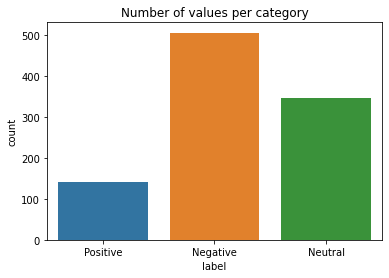

In [12]:
#Create a countplot
sns.countplot(df["label"]).set_title("Number of values per category")
plt.show()


In [24]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == "Positive"]["headline"])[:4],width=150)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == "Negative"]["headline"])[:4],width=150)

Positive headlines:

['Joe Biden elected president of the United States',
 'President Donald Trump says he has tested positive for coronavirus',
 'Joe Biden officially sworn in as the 46th President of the United States, Kamala Harris as the 49th Vice-President',
 "Supreme Court rules workers can't be fired for being gay or transgender"]

Negative headlines:

["Chauvin found guilty of murder, manslaughter in George Floyd's death",
 'Blizzard Employees Staged a Walkout After the Company Banned a Gamer for Pro-Hong Kong Views',
 'Kobe Bryant killed in helicopter crash in California',
 "'Jeopardy' host Alex Trebek dies at 80 due to pancreatic cancer"]
